# FENICS SOLVER
## minimalistic 

In [1]:
# Get the libraries
import fenics as fn
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [2]:
# define mesh and define function space
X    = 500  #x-limit
Y    = 500  #y-limit
NX   = 50  #x-steps
NY   = 50  #y-steps

mesh = fn.RectangleMesh(fn.Point(-X, -Y), fn.Point(X, Y), NX, NY)

Poly    = fn.FiniteElement('Lagrange', mesh.ufl_cell(),2)
ElemP   = [Poly] * (2) 
Elem    = [ElemP][0]
Mixed   = fn.MixedElement(Elem)
V       = fn.FunctionSpace(mesh, Mixed)


In [3]:
# define potentials and concentrations
u_GND  = fn.Expression('0', degree=2)
u_DD   = fn.Expression('0.5', degree=2)
c_INIT = fn.Expression('0.000001', degree=2)

# define boundaries
def boundaryGND(x, on_boundary):
    tol=1e-12
    return ((x[1] < -400 + tol)) 
def boundaryHigh(x, on_boundary):
    tol=1e-12
    return (x[1] > pow(x[0]/5,2)  - tol)

# set boundary conditions
GammaGND  = fn.DirichletBC(V.sub(0), u_GND, boundaryGND)  # ground potential at straight electrode
GammaHigh = fn.DirichletBC(V.sub(0), u_DD, boundaryHigh)  # high potential at shaped electrode
GammaC_GND = fn.DirichletBC(V.sub(1) , c_INIT, boundaryGND) # given concentration at straight electrode

bcs=[GammaGND,GammaHigh,GammaC_GND]


# define problem
UC    = fn.Function(V)
uc    = fn.split(UC)
u, c  = uc[0], uc[1]

VW    = fn.TestFunctions(V)                    
v, w  = VW[0], VW[1]

#create rotation
r = fn.Expression('x[0]', degree=1)

# changing concentrations charges
PoissonLeft     = (fn.dot(r*fn.grad(u), fn.grad(v)))*fn.dx
PoissonRight    = r*c*v*fn.dx
NernstPlanck    = fn.dot(-fn.grad(c) - c*fn.grad(u),fn.grad(w))*fn.dx

PNP_xy     = PoissonLeft + PoissonRight + NernstPlanck
 

In [4]:
# Compute solution
fn.solve(PNP_xy == 0, UC, bcs) # solve function

In [5]:
%matplotlib notebook
x,y=mesh.coordinates().T
X=x.reshape(NX+1,NY+1)
Y=y.reshape(NX+1,NY+1)

<IPython.core.display.Javascript object>


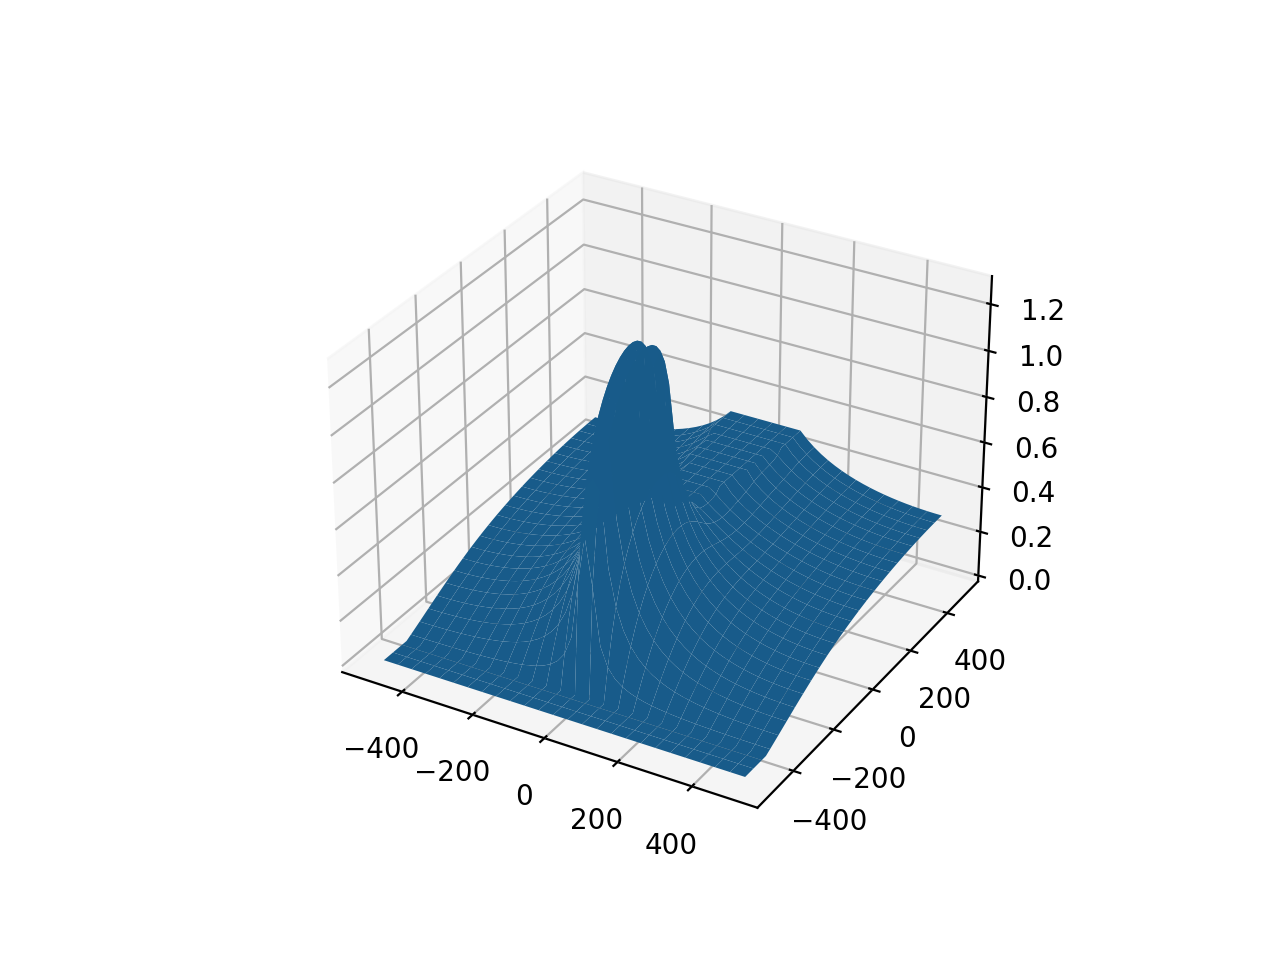

<IPython.core.display.Javascript object>


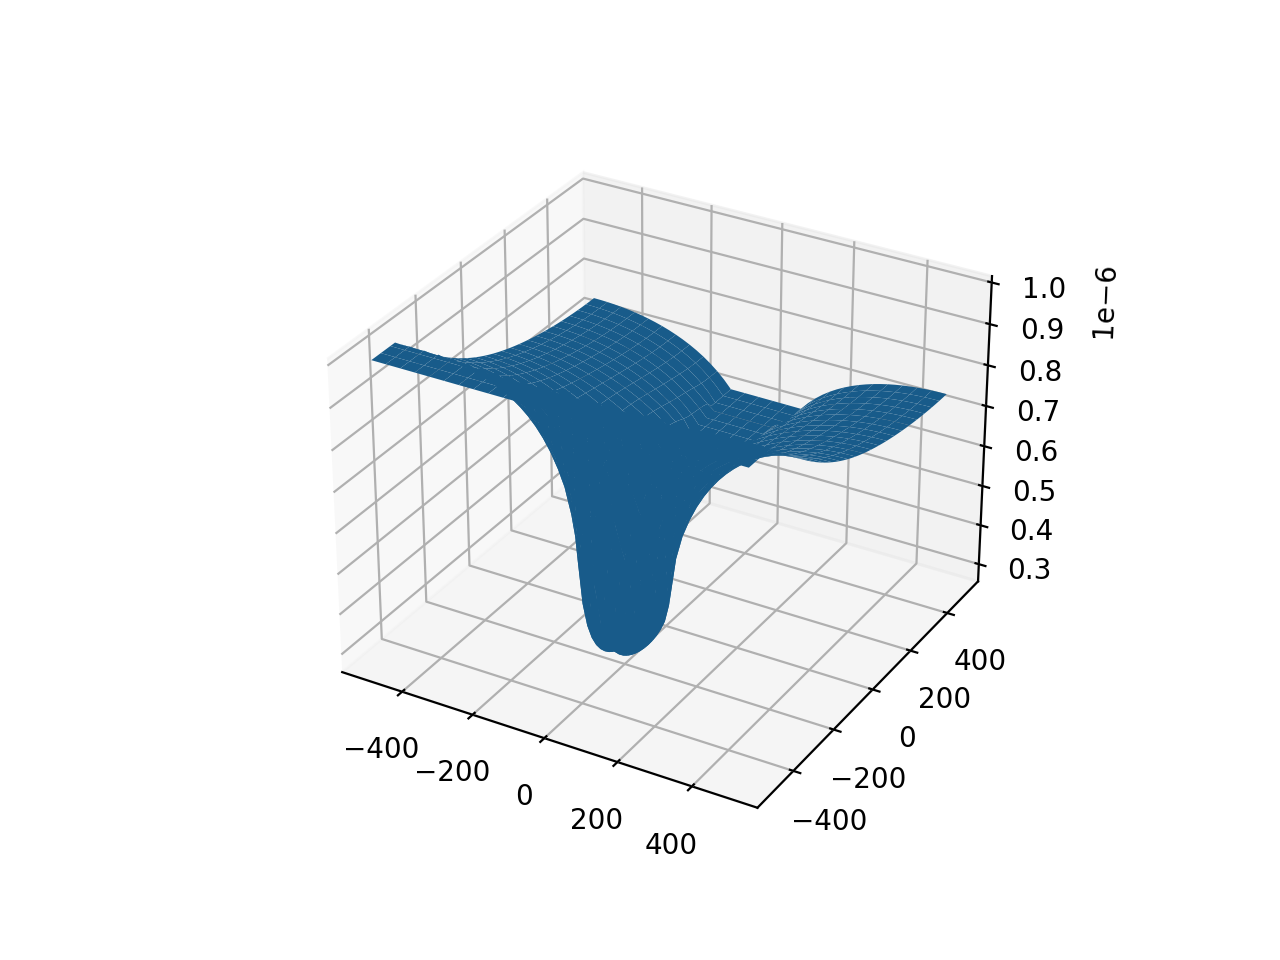

In [6]:
w_xy = np.array([UC(xy) for xy in mesh.coordinates()])
W_xy = w_xy.reshape((NX+1),(NY+1),2)
U_xy = W_xy[:,:,0]
C_xys = W_xy[:,:,1:]



fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X,Y,U_xy)


fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X,Y,C_xys[:,:,0])



In [7]:
def contour(array):
    fig = plt.figure()
    ax = fig.add_subplot()
    ax.contour(array)

<IPython.core.display.Javascript object>


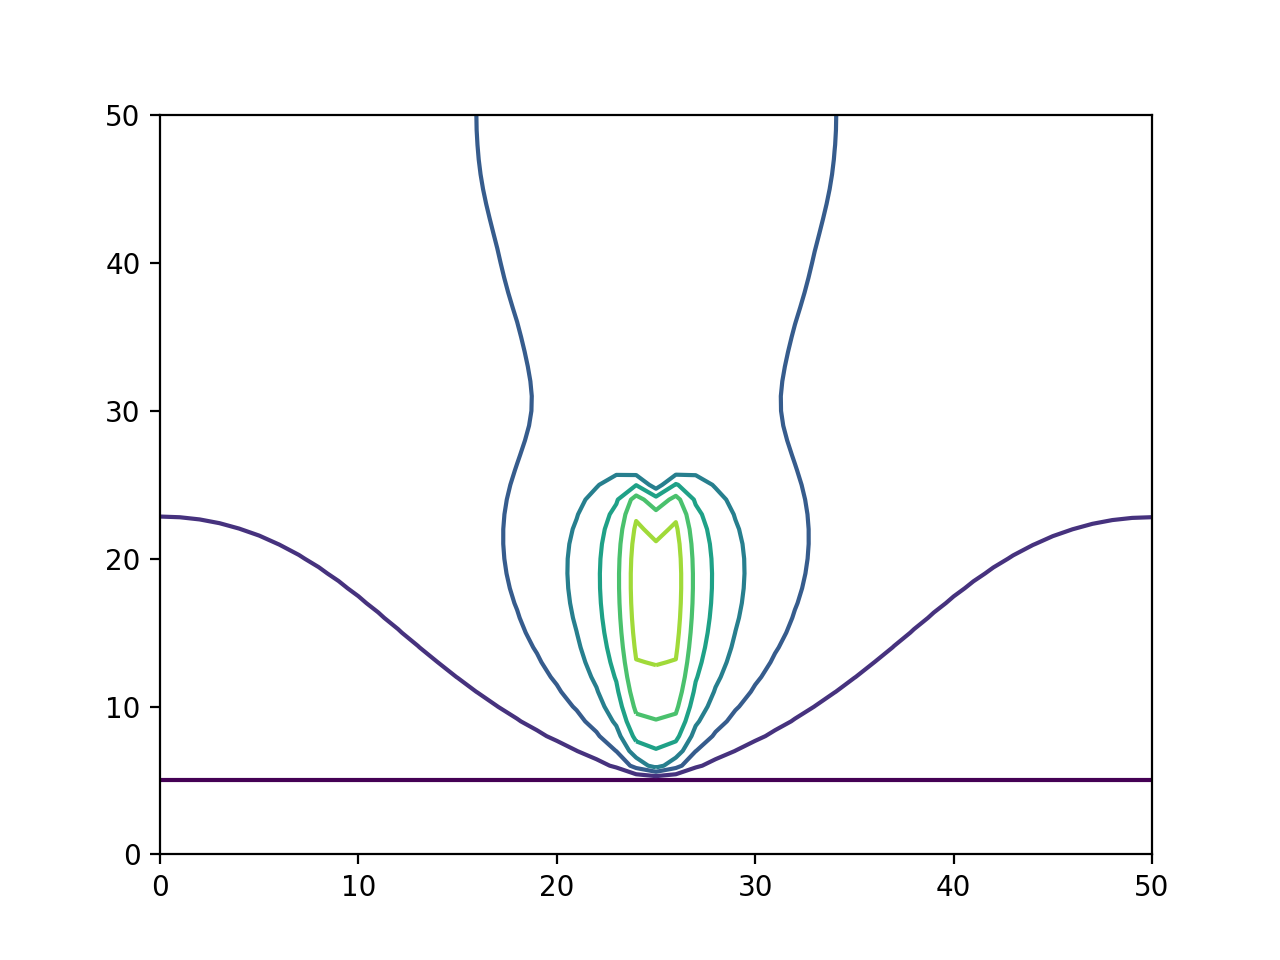

In [8]:
contour(U_xy)

<IPython.core.display.Javascript object>


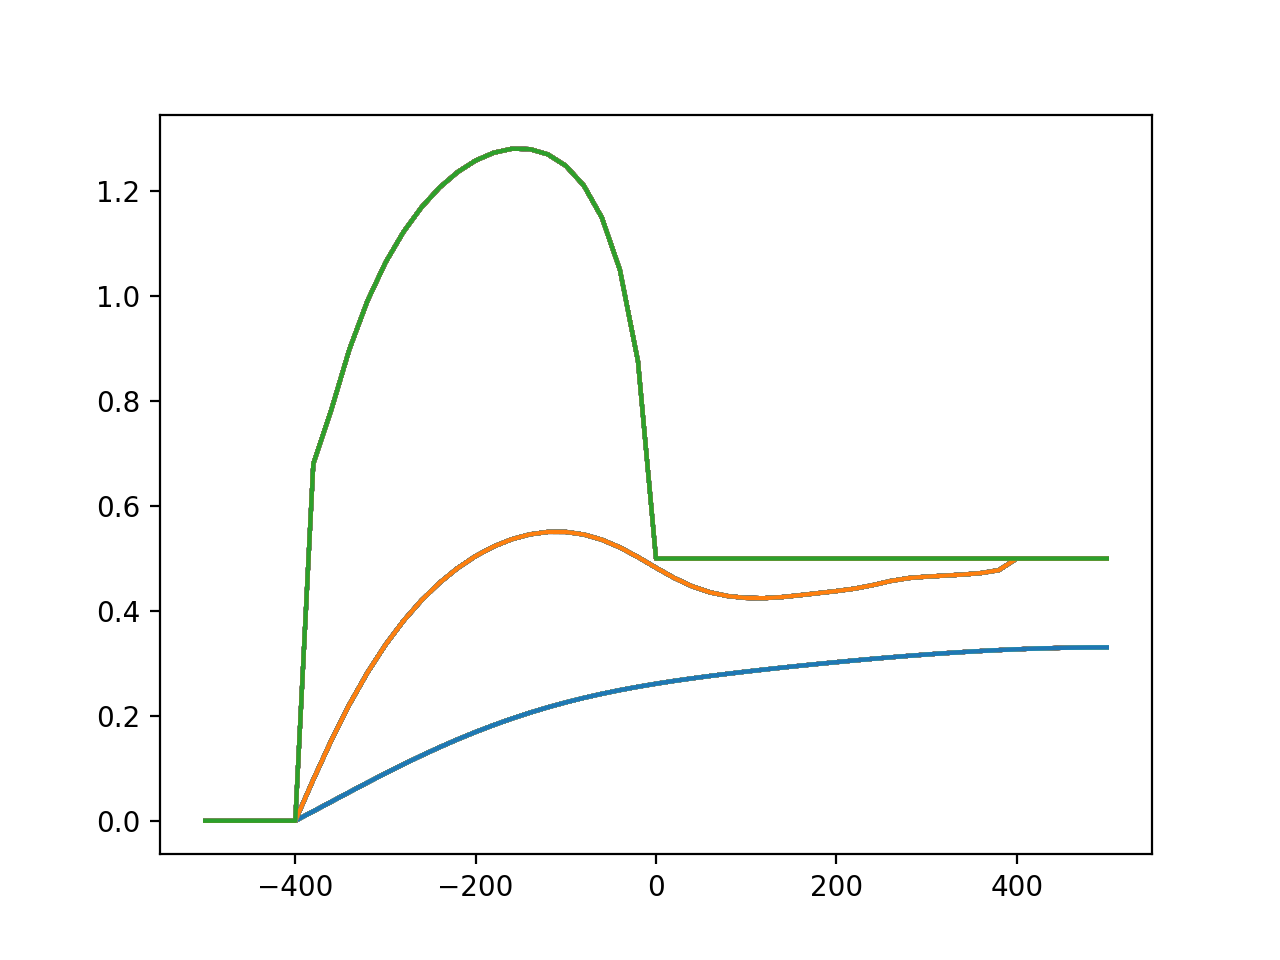

In [9]:
fig = plt.figure()
ax = fig.add_subplot()
ax.plot(Y,U_xy[::,10])
ax.plot(Y,U_xy[::,20])
ax.plot(Y,U_xy[::,25])

<IPython.core.display.Javascript object>


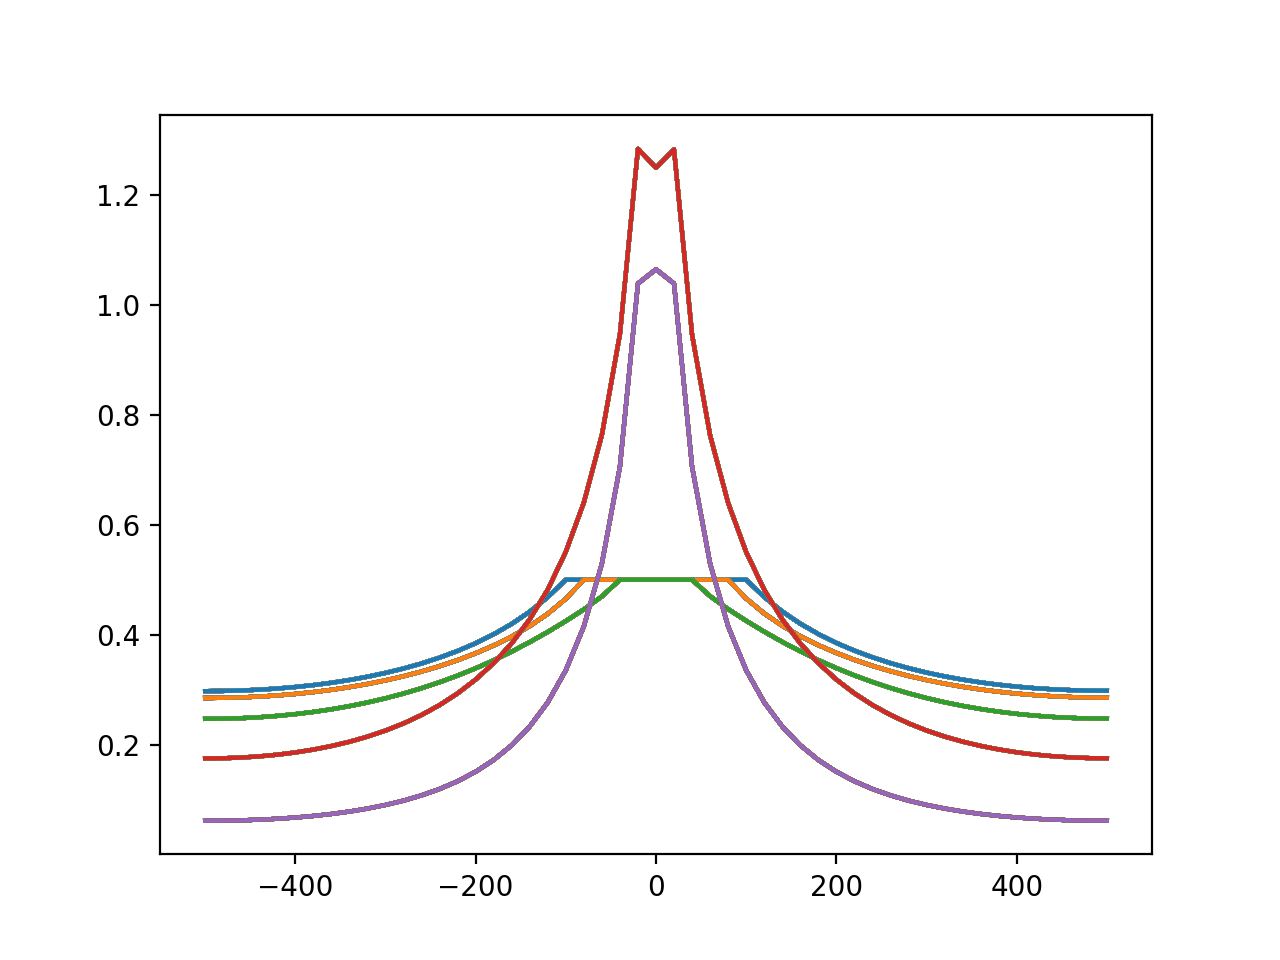

In [10]:
fig = plt.figure()
ax = fig.add_subplot()
ax.plot(Y,U_xy[50])
ax.plot(Y,U_xy[40])
ax.plot(Y,U_xy[30])
ax.plot(Y,U_xy[20])
ax.plot(Y,U_xy[10])